In [10]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from tqdm import tqdm

In [5]:
data_dir = r"C:\Users\deepa\cricket_dashboard\argument img"
img_size = 64

X = []
y = []
label_dict = {}
label_count = 0

for player in os.listdir(data_dir):
    player_path = os.path.join(data_dir, player)
    if os.path.isdir(player_path):
        label_dict[label_count] = player
        for img_name in os.listdir(player_path):
            img_path = os.path.join(player_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (img_size, img_size))
                X.append(img)
                y.append(label_count)
        label_count += 1

X = np.array(X)
y = np.array(y)

print("✅ Dataset Created")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


✅ Dataset Created
Shape of X: (3244, 64, 64, 3)
Shape of y: (3244,)


In [6]:
# Normalize and flatten
X = X / 255.0
X = X.reshape(len(X), -1)  # Flatten images

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data Split into Train/Test")


✅ Data Split into Train/Test


In [7]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (3244, 12288)
Shape of y: (3244,)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from tqdm import tqdm

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Naive Bayes": GaussianNB()
}

for name, model in tqdm(models.items(), desc="Training Models"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n📌 {name}")
    print(f"✅ Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred, target_names=list(label_dict.values())))


Training Models:  17%|███████████▏                                                       | 1/6 [00:38<03:12, 38.54s/it]


📌 Logistic Regression
✅ Accuracy: 0.83
                     precision    recall  f1-score   support

     Arshdeep Singh       0.86      0.96      0.91        56
         Axar Patel       0.90      0.88      0.89        41
      Hardik Pandya       0.79      0.78      0.78        49
       Harshit Rana       0.85      0.78      0.82        37
           KL Rahul       0.82      0.80      0.81        46
      Kuldeep Yadav       0.89      0.82      0.85        49
     Mohammed Shami       0.94      0.83      0.88        41
    Ravindra Jadeja       0.88      0.80      0.84        35
       Rishabh Pant       0.71      0.87      0.78        46
       rohit sharma       0.76      0.66      0.70        29
       Shreyas Iyer       0.84      0.86      0.85        57
       Shubman Gill       0.85      0.85      0.85        39
Varun Chakaravarthy       0.83      0.70      0.76        27
        Virat Kohli       0.82      0.85      0.84        48
  Washington Sundar       0.80      0.90    

C:\Users\deepa\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\deepa\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\deepa\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\deepa\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\deepa\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro


📌 KNN
✅ Accuracy: 0.53
                     precision    recall  f1-score   support

     Arshdeep Singh       0.57      0.82      0.67        56
         Axar Patel       0.52      0.76      0.61        41
      Hardik Pandya       0.48      0.47      0.47        49
       Harshit Rana       0.39      0.68      0.50        37
           KL Rahul       0.59      0.43      0.50        46
      Kuldeep Yadav       0.44      0.49      0.47        49
     Mohammed Shami       0.61      0.54      0.57        41
    Ravindra Jadeja       0.78      0.40      0.53        35
       Rishabh Pant       0.43      0.61      0.50        46
       rohit sharma       0.50      0.28      0.36        29
       Shreyas Iyer       0.61      0.63      0.62        57
       Shubman Gill       0.79      0.49      0.60        39
Varun Chakaravarthy       0.36      0.30      0.33        27
        Virat Kohli       0.74      0.42      0.53        48
  Washington Sundar       0.56      0.47      0.51        49

Training Models:  50%|█████████████████████████████████▌                                 | 3/6 [01:38<01:47, 35.77s/it]


📌 SVM
✅ Accuracy: 0.85
                     precision    recall  f1-score   support

     Arshdeep Singh       0.84      0.96      0.90        56
         Axar Patel       0.88      0.88      0.88        41
      Hardik Pandya       0.71      0.80      0.75        49
       Harshit Rana       0.78      0.84      0.81        37
           KL Rahul       0.89      0.85      0.87        46
      Kuldeep Yadav       0.94      0.90      0.92        49
     Mohammed Shami       0.92      0.88      0.90        41
    Ravindra Jadeja       0.81      0.83      0.82        35
       Rishabh Pant       0.72      0.78      0.75        46
       rohit sharma       0.80      0.69      0.74        29
       Shreyas Iyer       0.90      0.79      0.84        57
       Shubman Gill       0.92      0.92      0.92        39
Varun Chakaravarthy       0.87      0.74      0.80        27
        Virat Kohli       0.88      0.88      0.88        48
  Washington Sundar       0.88      0.86      0.87        49

Training Models:  67%|████████████████████████████████████████████▋                      | 4/6 [02:34<01:27, 43.78s/it]


📌 Decision Tree
✅ Accuracy: 0.31
                     precision    recall  f1-score   support

     Arshdeep Singh       0.50      0.50      0.50        56
         Axar Patel       0.34      0.34      0.34        41
      Hardik Pandya       0.37      0.31      0.33        49
       Harshit Rana       0.15      0.16      0.16        37
           KL Rahul       0.29      0.30      0.29        46
      Kuldeep Yadav       0.38      0.31      0.34        49
     Mohammed Shami       0.43      0.51      0.47        41
    Ravindra Jadeja       0.34      0.31      0.33        35
       Rishabh Pant       0.22      0.20      0.21        46
       rohit sharma       0.12      0.14      0.13        29
       Shreyas Iyer       0.31      0.30      0.31        57
       Shubman Gill       0.36      0.36      0.36        39
Varun Chakaravarthy       0.13      0.15      0.14        27
        Virat Kohli       0.28      0.31      0.29        48
  Washington Sundar       0.31      0.33      0.32

Training Models:  83%|███████████████████████████████████████████████████████▊           | 5/6 [03:13<00:42, 42.09s/it]


📌 Random Forest
✅ Accuracy: 0.68
                     precision    recall  f1-score   support

     Arshdeep Singh       0.67      0.96      0.79        56
         Axar Patel       0.76      0.68      0.72        41
      Hardik Pandya       0.60      0.53      0.57        49
       Harshit Rana       0.66      0.68      0.67        37
           KL Rahul       0.71      0.54      0.62        46
      Kuldeep Yadav       0.60      0.65      0.63        49
     Mohammed Shami       0.83      0.71      0.76        41
    Ravindra Jadeja       0.87      0.57      0.69        35
       Rishabh Pant       0.57      0.72      0.63        46
       rohit sharma       1.00      0.48      0.65        29
       Shreyas Iyer       0.55      0.72      0.62        57
       Shubman Gill       0.84      0.82      0.83        39
Varun Chakaravarthy       0.87      0.48      0.62        27
        Virat Kohli       0.64      0.67      0.65        48
  Washington Sundar       0.70      0.78      0.74

Training Models: 100%|███████████████████████████████████████████████████████████████████| 6/6 [03:15<00:00, 32.63s/it]


📌 Naive Bayes
✅ Accuracy: 0.38
                     precision    recall  f1-score   support

     Arshdeep Singh       0.45      0.68      0.54        56
         Axar Patel       0.35      0.29      0.32        41
      Hardik Pandya       0.50      0.12      0.20        49
       Harshit Rana       0.42      0.41      0.41        37
           KL Rahul       0.48      0.26      0.34        46
      Kuldeep Yadav       0.48      0.45      0.46        49
     Mohammed Shami       0.23      0.51      0.32        41
    Ravindra Jadeja       0.35      0.26      0.30        35
       Rishabh Pant       0.25      0.39      0.31        46
       rohit sharma       0.29      0.17      0.22        29
       Shreyas Iyer       0.43      0.40      0.41        57
       Shubman Gill       0.66      0.54      0.59        39
Varun Chakaravarthy       0.20      0.33      0.25        27
        Virat Kohli       0.36      0.33      0.34        48
  Washington Sundar       0.59      0.35      0.44  

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_scaled

array([[-0.32987974, -0.39731224,  1.19014723, ..., -0.55471983,
         0.80707905,  1.47114987],
       [-0.76698087, -0.76734761,  0.38959788, ...,  1.24587386,
         1.17711385,  1.24323641],
       [-0.41257455, -0.39731224, -0.39917869, ...,  0.37319348,
         0.40340472,  0.36414163],
       ...,
       [-0.38894746, -0.37343899, -0.37563312, ..., -0.13494952,
        -0.11240137, -0.13509737],
       [-0.36532038, -0.37343899, -0.38740591, ...,  0.25168103,
         0.02215674, -0.52580616],
       [-1.05050593, -1.0538266 , -1.02313627, ..., -1.27274798,
        -1.26735848, -1.24210561]])

In [22]:
pca = PCA(n_components=300)
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X.shape)
print("Reduced shape:", X_pca.shape)


Original shape: (3244, 12288)
Reduced shape: (3244, 300)


In [19]:


X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)


In [23]:

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


✅ Accuracy: 0.8351309707241911
              precision    recall  f1-score   support

           0       0.87      0.96      0.92        56
           1       0.90      0.88      0.89        41
           2       0.81      0.80      0.80        49
           3       0.88      0.78      0.83        37
           4       0.82      0.80      0.81        46
           5       0.85      0.82      0.83        49
           6       0.92      0.85      0.89        41
           7       0.85      0.80      0.82        35
           8       0.70      0.83      0.76        46
           9       0.73      0.66      0.69        29
          10       0.87      0.84      0.86        57
          11       0.85      0.90      0.88        39
          12       0.83      0.74      0.78        27
          13       0.78      0.81      0.80        48
          14       0.85      0.92      0.88        49

    accuracy                           0.84       649
   macro avg       0.84      0.83      0.83      

In [24]:
explained_var = np.sum(pca.explained_variance_ratio_)
print(f"Variance retained with 100 components: {explained_var:.2f}")


Variance retained with 100 components: 0.97


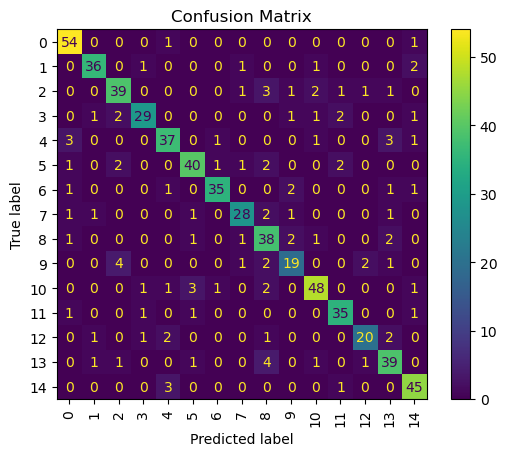

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='viridis', xticks_rotation=90)
plt.title("Confusion Matrix")
plt.show()


In [36]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X_pca, y, cv=5, scoring='accuracy', n_jobs=-1
)

# You can plot this if you'd like


In [37]:
index = 42  # any test index
sample = X_test[index].reshape(1, -1)
prediction = model.predict(sample)

print("Predicted label:", prediction[0])
print("True label:", y_test[index])


Predicted label: 3
True label: 3


In [38]:
probs = model.predict_proba(sample)
for i, p in enumerate(probs[0]):
    print(f"Class {i}: {p:.2f}")


Class 0: 0.00
Class 1: 0.00
Class 2: 0.00
Class 3: 0.99
Class 4: 0.00
Class 5: 0.00
Class 6: 0.00
Class 7: 0.00
Class 8: 0.00
Class 9: 0.00
Class 10: 0.00
Class 11: 0.00
Class 12: 0.01
Class 13: 0.00
Class 14: 0.00


In [41]:
import numpy as np
top_indices = np.argsort(probs[0])[::-1][:5]

for idx in top_indices:
    print(f"Class {idx}: {probs[0][idx]:.2f}")


Class 3: 0.99
Class 12: 0.01
Class 11: 0.00
Class 14: 0.00
Class 1: 0.00


In [42]:
probs_all = model.predict_proba(X_test)
wrong_preds = (y_pred != y_test)

for i in np.where(wrong_preds)[0]:
    top_class = np.argmax(probs_all[i])
    confidence = probs_all[i][top_class]
    print(f"Sample {i} | True: {y_test[i]} | Pred: {y_pred[i]} | Confidence: {confidence:.2f}")


Sample 0 | True: 9 | Pred: 13 | Confidence: 0.88
Sample 9 | True: 13 | Pred: 12 | Confidence: 0.79
Sample 30 | True: 6 | Pred: 13 | Confidence: 0.92
Sample 32 | True: 9 | Pred: 8 | Confidence: 0.79
Sample 36 | True: 6 | Pred: 4 | Confidence: 0.44
Sample 40 | True: 5 | Pred: 6 | Confidence: 0.54
Sample 49 | True: 14 | Pred: 4 | Confidence: 0.90
Sample 50 | True: 1 | Pred: 3 | Confidence: 1.00
Sample 51 | True: 2 | Pred: 12 | Confidence: 0.70
Sample 54 | True: 10 | Pred: 5 | Confidence: 0.44
Sample 64 | True: 7 | Pred: 0 | Confidence: 0.93
Sample 70 | True: 4 | Pred: 6 | Confidence: 0.55
Sample 81 | True: 4 | Pred: 0 | Confidence: 0.98
Sample 82 | True: 10 | Pred: 8 | Confidence: 0.98
Sample 89 | True: 4 | Pred: 14 | Confidence: 0.64
Sample 92 | True: 2 | Pred: 11 | Confidence: 0.97
Sample 110 | True: 14 | Pred: 4 | Confidence: 0.88
Sample 115 | True: 7 | Pred: 1 | Confidence: 0.72
Sample 118 | True: 10 | Pred: 5 | Confidence: 0.42
Sample 125 | True: 5 | Pred: 8 | Confidence: 0.48
Sample